<a href="https://colab.research.google.com/github/19WH1A0524/OptimizationTechniqueCompar/blob/main/final_compare_pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
from random import random
from random import random,randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import seaborn as sns # data visualization library

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [ ]:
df = pd.read_csv("data.csv")
df['Unnamed: 32'] = 0
df = df.drop(columns=["id"])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_bc = pd.read_csv("data.csv")
label_bc = data_bc["diagnosis"]
label_bc = np.where(label_bc == 'M',1,0)
data_bc.drop(["id","diagnosis","Unnamed: 32"],axis = 1,inplace = True)

print("Breast Cancer dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

Breast Cancer dataset:
 569 Records
 30 Features


In [ ]:
display(data_bc.head())
print("All the features in this dataset have continuous values")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


All the features in this dataset have continuous values
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

In [ ]:
# Classification Accuracy , Precision and Recall
def classification_accuracy(y_actual, y_hat):
        TP = 0
        FP = 0
        TN = 0
        FN = 0

        for i in range(len(y_hat)):
            if y_actual[i]==y_hat[i]==1:
                TP += 1
            if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
                FP += 1
            if y_actual[i]==y_hat[i]==0:
                TN += 1
            if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
                FN += 1


        class_acc = float((TP+TN)) / float((TP+FP+TN+FN))

        if TP == 0 and FN == 0 :
            recall = 0
        else:
            recall  = float(TP) / float(TP + FN)

        if TP == 0 and FP == 0:
            precision = 0
        else:
            precision = float(TP) / float( TP + FP )



        return (class_acc, recall, precision)

In [ ]:
# Fitness without optimization
def fitness_without_optimization(df1):

    # Separate labels and features
        X = df1.drop(columns=['diagnosis'])
        y = df1['diagnosis']


        # Convert the M to 1 and B to 0
        label = LabelEncoder()
        y = label.fit_transform(y)
        y[:20]

        # Spilt the train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)# we used 30% test data
        X_train.shape, X_test.shape, y_train.shape, y_test.shape

        # Logistic Regression
        LR = LogisticRegression()
        LR.fit(X_train, y_train)
        LR.score(X_train, y_train)
        y_pred = LR.predict(X_test)
        y_pred_train = LR.predict(X_train)

        # find accuracy
        ac = accuracy_score(y_test, y_pred)
        ac_train = accuracy_score(y_train, y_pred_train)
        # # Code for ROC_AUC curve
        # rc = roc_auc_score(y_test, y_pred)
        # print(rc)
        cm_2 = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm_2,annot=True,fmt="d")

        class_acc = classification_accuracy(y_test, y_pred)
        return class_acc

In [ ]:
classifiers = ['Logistic']

models = [LogisticRegression(max_iter = 1000)]

error=0.02
def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions)-error)
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
class BPSO:
    def __init__(self, f_count, df):

        #feature count
        self.f_count  = f_count
        # Actual Positions  radmon prob
        self.pos_act  = []
        # Position prob > 0.5 set as 1 or 0
        self.position = []
        # Velocity random between -1 and 1
        self.velocity = []
        # best position
        self.pos_best = []
        # Y actual
        self.y_actual = []
        # Y test predicted
        self.y_predict= []
        # best fit accuracy, Recall, Precision
        self.fit_best = (-1, -1, -1)
        # accuracy , recall, precsion
        self.fitness  = (-1, -1, -1)
        # data
        self.df       = df.copy()

        self.initialize(f_count)

    # initialize
    def initialize(self, f_count):
        self.f_count = f_count
        self.initalize_position(f_count)
        self.initialize_velocity(f_count)

    def set_data(self,data):
        self.df = data.copy()
        print(self.df.head())

    #Initialize the positions > 0.5  is set as 1
    def initalize_position(self,f_count):
        self.pos_act = np.random.uniform(low=0, high=1, size=f_count).tolist()
        self.position = [1 if po > 0.5 else 0  for po in self.pos_act]

    def initialize_velocity(self, f_count):
        self.velocity = np.random.uniform(low=-1, high=1, size=f_count).tolist()


    def drop_columns(self, X):
        print(X.shape)
        print(self.position)
        for index, value in enumerate(self.position):
            if value == 0 :
                X_1 = X.drop(X.columns[index], axis = 1)
        return X_1

    def classification_accuracy(self,y_actual, y_hat):
        TP = 0
        FP = 0
        TN = 0
        FN = 0

        for i in range(len(y_hat)):
            if y_actual[i]==y_hat[i]==1:
                TP += 1
            if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
                FP += 1
            if y_actual[i]==y_hat[i]==0:
                TN += 1
            if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
                FN += 1


        class_acc = float((TP+TN)) / float((TP+FP+TN+FN))
        #if TP ==0 and FN == 0:

        if TP == 0 and FN == 0 :
            recall = 0
        else:
            recall  = float(TP) / float(TP + FN)

        if TP == 0 and FP == 0:
            precision = 0
        else:
            precision = float(TP) / float( TP + FP )



        return (class_acc, recall, precision)


    def process_data(self):

        #self.df = self.df.drop(columns=['id'])

        # Separate labels and features
        X = self.df.drop(columns=['diagnosis'])
        y = self.df['diagnosis']

        X = self.drop_columns(X)


        # Convert the M to 1 and B to 0
        label = LabelEncoder()
        y = label.fit_transform(y)
        y[:20]

        # Spilt the train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        # we used 30% test data
        # check the size before beginning
        X_train.shape, X_test.shape, y_train.shape, y_test.shape

        # Logistic Regression
        LR = LogisticRegression()
        LR.fit(X_train, y_train)
        LR.score(X_train, y_train)
        y_pred = LR.predict(X_test)
        y_pred_train = LR.predict(X_train)

        # find accuracy
        ac = accuracy_score(y_test, y_pred)
        ac_train = accuracy_score(y_train, y_pred_train)
        # Code for ROC_AUC curve
        rc = roc_auc_score(y_test, y_pred)

        class_acc = self.classification_accuracy(y_test, y_pred)

        self.y_actual = y_test
        self.y_predict = y_pred

        return class_acc

    # fitness check, checks accuarcy and precision and accurarcy
    def fitness_check(self,fitness, fit_best):
        is_fitness = False

        if fitness[0] > fit_best[0] or fit_best[0] == -1:
            if fitness[1] >= fit_best[1] and fitness[2] >= fit_best[2]:
                is_fitness = True

        return is_fitness

    #evaluate the fitness
    def evaluate_fitness(self):
        self.fitness = self.process_data()



        if  self.fitness_check(self.fitness, self.fit_best):
            self.pos_best  = self.position.copy()
            self.fit_best = self.fitness

        #print("fitness")
        #print(self.fitness)

    def update_velocity(self, pos_best_global):

        c1 = 1
        c2 = 2
        w  = 0.5
       # rand=random.Random()

        #print('inside')
        #print(pos_best_global)
        for i in range(0, self.f_count):

            #r1 = rand.random()
            #r2 = rand.random()
            r1 = np.random.uniform(low=-1, high=1, size=1)[0]#random()
            r2 = np.random.uniform(low=-1, high=1, size=1)[0]#random()
            #print(i)   #print(self.pos_best[i]) #print(self.position[i])  #print(pos_best_global[i]) #print(self.position[i])
            velocity_cog = c1*r1*(self.pos_best[i]-self.position[i])
            velocity_soc = c2*r2*(pos_best_global[i]-self.position[i])

            self.velocity[i]=w*self.velocity[i]+velocity_cog+velocity_soc

    def update_position(self):

        for i in range(0, self.f_count):
            self.pos_act[i] = self.pos_act[i] + self.velocity[i]

            #adjust max value

            if self.pos_act[i] > 1:
                self.pos_act[i] = 0.9

            if self.pos_act[i] < 0 :
                self.pos_act[i] = 0.0

            self.position[i] = 1 if self.pos_act[i] > 0.5 else 0




    def print_position(self):
        print(self.position)

    def print_velocity(self):
        print(self.velocity)

In [ ]:
def pso_calculate(f_count, df):
    y_actual = []
    y_predict = []
    fitness_best_g = (-1, -1, -1)
    pos_fitness_g = []
    swarm = []
    no_population = 400

    for i in range(0,no_population):
        swarm.append(BPSO(f_count, df))

    #optimize
    index = 0

    while index < 50:

        for pos in range(0, no_population):
            swarm[pos].evaluate_fitness()

            #check current particle is the global best
            if swarm[pos].fitness_check(swarm[pos].fitness, fitness_best_g): #swarm[pos].fitness > fitness_best_g or fitness_best_g == -1:
                pos_fitness_g = list(swarm[pos].position)
                fitness_best_g = (swarm[pos].fitness)
                y_actual = swarm[pos].y_actual
                y_predict = swarm[pos].y_predict


        #print('fitneesssss')
        #print(pos_fitness_g)

        for pos in range(0, no_population):
            swarm[pos].update_velocity(pos_fitness_g)
            swarm[pos].update_position()

        index+=1

    print('\n Final Solution:')
    print(pos_fitness_g)
    print(fitness_best_g)
    cm_2 = confusion_matrix(y_actual, y_predict)
    sns.heatmap(cm_2,annot=True,fmt="d")
        #print(precision_score(y_test, y_pred))
        #print(recall_score(y_test, y_pred))


        #sns.heatmap(cm_2,annot=True,fmt="d")

accuracy without optimization : (0.9473684210526315, 0.8955223880597015, 0.967741935483871)


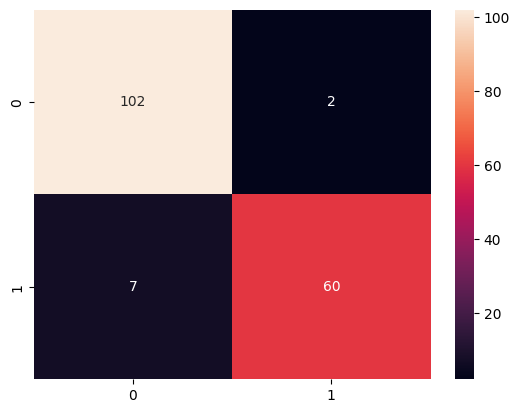

In [ ]:
acc_without = fitness_without_optimization(df.copy())
print('accuracy without optimization : ' + str(acc_without))

In [ ]:
# score1 = acc_score(data_bc,label_bc)
# score1

In [ ]:
logmodel = LogisticRegression(max_iter = 1000)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=3,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.973006993006993]
Best score in generation 2 : [0.973006993006993]
Best score in generation 3 : [0.973006993006993]


In [ ]:

df = pd.read_csv("data.csv")
df['Unnamed: 32'] = 0
df = df.drop(columns=["id"])

Streaming output truncated to the last 5000 lines.
(569, 31)
[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1]
(569, 31)
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
(569, 31)
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
(569, 31)
[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
(569, 31)
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1]
(569, 31)
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
(569, 31)
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
(569, 31)
[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]
(569, 31)
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
(569, 31)
[1,

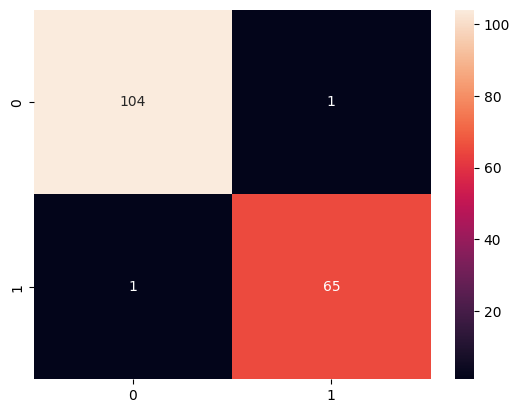

In [ ]:

pso_calculate(31,df)

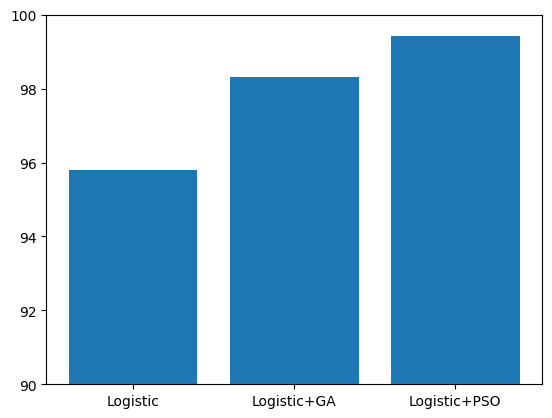

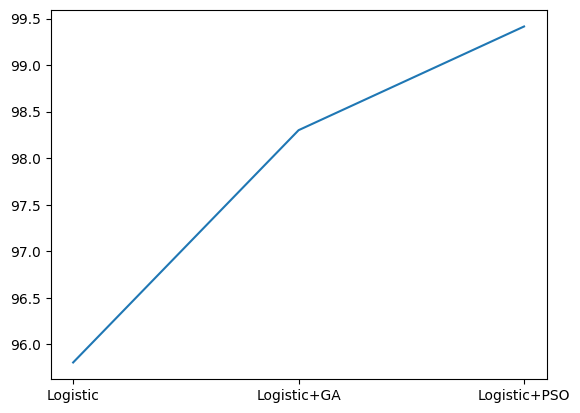

In [ ]:
x = np.array(["Logistic","Logistic+GA","Logistic+PSO"])
y = np.array([95.8042,98.3006930,99.4152046])

plt.bar(x,y)
plt.ylim(90, 100)
plt.show()
print()
xpoints = np.array(["Logistic","Logistic+GA","Logistic+PSO"])
ypoints = np.array([95.8042,98.3006930,99.4152046])

plt.plot(xpoints, ypoints)
plt.show()